In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [13]:
season_csvs = os.listdir('Steelers_Chiefs_Season_Sentiment_CSVs')
season_dfs = [pd.read_csv('Steelers_Chiefs_Season_Sentiment_CSVs/'+csv) for csv in season_csvs]

for df in season_dfs:
    df['Date'] = pd.to_datetime(df['Date'])

In [14]:
season_dfs[0].head() # 0 = Bears #

,Unnamed: 0,ID,Date,User,Tweet,HashTags,Likes,Retweets,MentionUsers,LocationCoordinates,clean_Tweet,NLTK_Sentiment_Analysis,TextBlob_Sentiment_Analysis,Compound_Sentiment_Score,Positive_Sentiment
0,0,1599916132340670466,2022-12-05 23:58:25+00:00,SportsOn580,580 Sports Talk for 12/5/22:\n\nHour 1: Big 12...,"['Chiefs', 'KStateFB']",0,1,"[User(username='MattVerderame', id=292505503, ...",NaN,580 sports talk 12 5 22 hour 1 big 12 cg fall ...,-0.0516,-0.057143,-0.108743,False
1,1,1599915383607427072,2022-12-05 23:55:27+00:00,preston_b_farr,"Since the Bye week, when the schedule was supp...",['Chiefs'],0,0,NaN,NaN,since bye week schedule supposed get easier ra...,0.8591,0.078571,0.937671,True
2,2,1599914832253390850,2022-12-05 23:53:15+00:00,ArrowheadAddict,Our own @BransenGibson explains why he quickly...,['Chiefs'],14,0,"[User(username='BransenGibson', id=22876022, d...",NaN,explains quickly got loss bengals,-0.3182,0.333333,0.015133,True
3,3,1599914457828065280,2022-12-05 23:51:46+00:00,H00SIER_DADDY22,#chiefs fans just made my top 5 most hated fan...,['chiefs'],0,0,NaN,NaN,fans made top 5 hated fan bases much respect t...,0.2500,-0.066667,0.183333,True
4,4,1599914271336546304,2022-12-05 23:51:01+00:00,ChiefsViews,Justin Reid apologizes to Hayden Hurst: I didn...,"['KansasCityChiefs', 'Chiefs', 'KCChiefs', 'Go...",0,0,NaN,NaN,justin reid apologizes hayden hurst give prope...,0.6808,0.000000,0.680800,True


In [15]:
b_game_1 = season_dfs[0]

In [16]:
def remove_users_from_df(df, list_users):
    indxs = df[df['User'].isin(list_users)].index
    dfc = df.drop(indxs, inplace=False)
    return dfc

users = b_game_1.groupby(['User']).size().sort_values(ascending=False).head(5)
print(users)
l = list(users.index.values) 
b_game_1_c = remove_users_from_df(b_game_1,l)
b_game_1_c.groupby(['User']).size().sort_values(ascending=False).head(5)

User
ChiefsViews      722
goldmctNFL       115
TheChiefsWire     98
CjGeiss           82
PJGreenTV         76
dtype: int64


User
ArrowheadPride    66
Jacobs71          64
BrettRasdall      61
ChiefsFocus       55
ConcernsChief     48
dtype: int64

In [17]:
season_dfs[0].columns

Index(['Unnamed: 0', 'ID', 'Date', 'User', 'Tweet', 'HashTags', 'Likes',
       'Retweets', 'MentionUsers', 'LocationCoordinates', 'clean_Tweet',
       'NLTK_Sentiment_Analysis', 'TextBlob_Sentiment_Analysis',
       'Compound_Sentiment_Score', 'Positive_Sentiment'],
      dtype='object')

In [18]:
def make_scatter_and_pie_figure(df,fig_name,save=False):
    fig, axes = plt.subplots(2, 1, figsize=(15, 10))
    sns.set_style('whitegrid')
    #scatter
    sns.scatterplot(ax=axes[0],x=df['Date'],y=df["Compound_Sentiment_Score"],hue=df['Positive_Sentiment'])
    axes[0].set_title('Positive and Negative Sentiment Socores over Time Scatter Plot',fontsize=12)
    #pie
    true = len(df.loc[(df['Positive_Sentiment']==True)])
    false = len(df.loc[(df['Positive_Sentiment']==False)])
    axes[1].pie([false,true],labels=["Negative",'Positive'])
    axes[1].set_title('Pie Plot of Sentiment Labels',fontsize=12)
    fig.suptitle(fig_name, fontsize=20)
    if save: #save the figure
        plt.savefig(fig_name)

In [19]:
season_csvs

['Chiefss_Season_Sentiment.csv', 'Steelers_Season_Sentiment.csv']

In [20]:
# users = season_dfs[0].groupby(['User']).size().sort_values(ascending=False).head(5)
# l = list(users.index.values) 
# make_scatter_and_pie_figure(remove_users_from_df(season_dfs[0], l), 'chiefs  Bears - Removed Users')

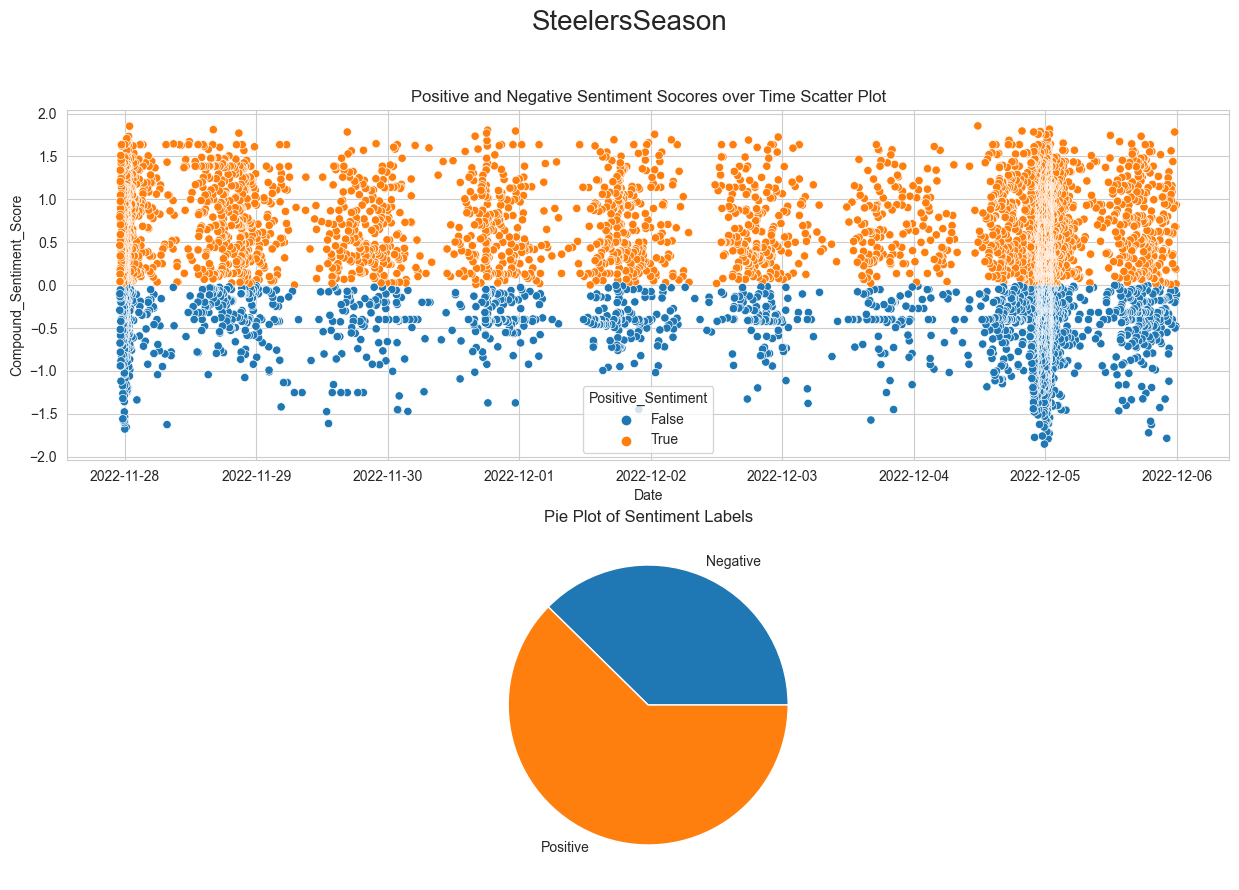

In [21]:
make_scatter_and_pie_figure(season_dfs[0], 'SteelersSeason', save = True)

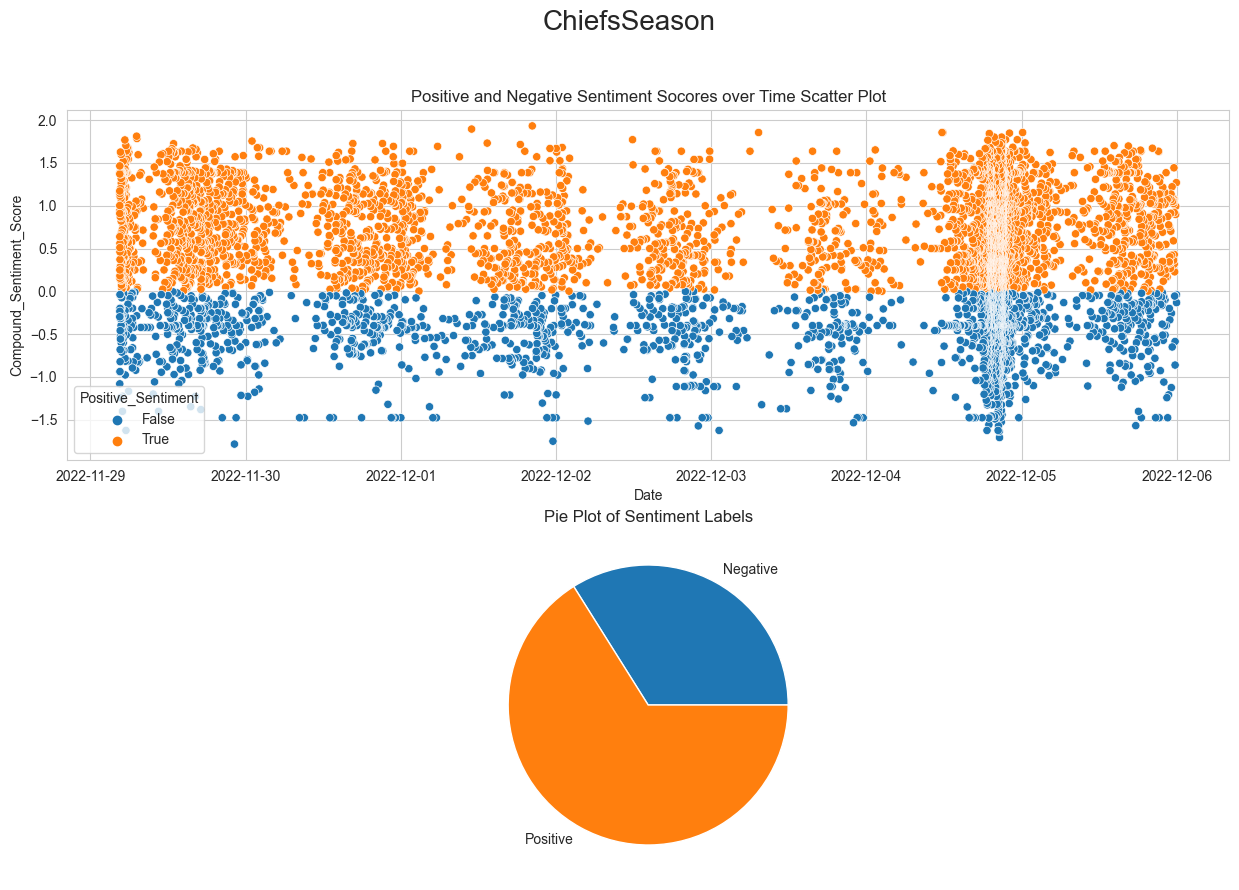

In [22]:
make_scatter_and_pie_figure(season_dfs[1], 'ChiefsSeason', save = True)